# 🌿Herbarium 2022 - FGVC9 EDA with Pytorch🍀
Identify plant species of the Americas from herbarium specimens

<img src = 'https://storage.googleapis.com/kaggle-competitions/kaggle/33679/logos/header.png?t=2022-02-14-16-38-02'>


## Content
- **Load Dataset**
- **JSON -> DataFrame**
- **Mapping genus**
- **Data Visualization**
- **Modeling**
- **Train & Evaluate**
- **Conclusion**

<br>

**If it helped about this Notebook, Please Upvote!!**
<br>

**Feedback is always appreciated!!**

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:green; border:0' role="tab" aria-controls="home">
<center>Load Dataset</center></h3>

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

train_dir = '/home/amorante/herbarium/train_images/'
test_dir = '/home/amorante/herbarium/test_images/'

with open("/home/amorante/herbarium/train_metadata.json") as json_file:
    train_meta = json.load(json_file)
with open("/home/amorante/herbarium/test_metadata.json") as json_file:
    test_meta = json.load(json_file)

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:green; border:0' role="tab" aria-controls="home">
<center>JSON -> DataFrame</center></h3>

In [2]:
image_ids = [image["image_id"] for image in train_meta["images"]]
image_dirs = [train_dir + image['file_name'] for image in train_meta["images"]]
category_ids = [annotation['category_id'] for annotation in train_meta['annotations']]
genus_ids = [annotation['genus_id'] for annotation in train_meta['annotations']]
families = [category["family"] for category in train_meta['categories']]
species = [category["species"] for category in train_meta['categories']]

test_ids = [image['image_id'] for image in test_meta]
test_dirs = [test_dir + image['file_name'] for image in test_meta]

train_df = pd.DataFrame({
    "image_id" : image_ids,
    "image_dir" : image_dirs,
    "category" : category_ids,
    "genus" : genus_ids
        })

test_df = pd.DataFrame({
    "test_id" : test_ids,
    "test_dir" : test_dirs
})

len(pd.DataFrame(species)[0].unique()) #not equal to 15501 bc of name repetition but unique with genus.
len(pd.DataFrame(species)[0])#here we find the 15501
len(pd.DataFrame(families)[0].unique())
len(train_df['genus'].unique())
len(train_df['category'].unique())

train_df.head()

image_id                                          image_dir  category  \
0  00000__001  /home/amorante/herbarium/train_images/000/00/0...         0   
1  00000__002  /home/amorante/herbarium/train_images/000/00/0...         0   
2  00000__003  /home/amorante/herbarium/train_images/000/00/0...         0   
3  00000__004  /home/amorante/herbarium/train_images/000/00/0...         0   
4  00000__005  /home/amorante/herbarium/train_images/000/00/0...         0   

   genus  
0      1  
1      1  
2      1  
3      1  
4      1

In [17]:
len(pd.DataFrame(families)[0].unique())

272

In [7]:
len(train_df['genus'].unique())

2564

In [8]:
len(train_df['category'].unique())

15501

In [3]:
genus_map = {genus['genus_id'] : genus['genus'] for genus in train_meta['genera']}
train_df['genus'] = train_df['genus'].map(genus_map)
train_df

image_id                                          image_dir  \
0       00000__001  /home/amorante/herbarium/train_images/000/00/0...   
1       00000__002  /home/amorante/herbarium/train_images/000/00/0...   
2       00000__003  /home/amorante/herbarium/train_images/000/00/0...   
3       00000__004  /home/amorante/herbarium/train_images/000/00/0...   
4       00000__005  /home/amorante/herbarium/train_images/000/00/0...   
...            ...                                                ...   
839767  15504__032  /home/amorante/herbarium/train_images/155/04/1...   
839768  15504__033  /home/amorante/herbarium/train_images/155/04/1...   
839769  15504__035  /home/amorante/herbarium/train_images/155/04/1...   
839770  15504__036  /home/amorante/herbarium/train_images/155/04/1...   
839771  15504__037  /home/amorante/herbarium/train_images/155/04/1...   

        category        genus  
0              0        Abies  
1              0        Abies  
2              0        Abies  
3              0        Abies  
4              0        Abies  
...          ...          ...  
839767     15504  Zygophyllum  
839768     15504  Zygophyllum  
839769     15504  Zygophyllum  
839770     15504  Zygophyllum  
839771     15504  Zygophyllum  

[839772 rows x 4 columns]

In [13]:
pth="/home/amorante/herbarium/train_images/151/00/15100__001.jpg"
from PIL import Image
import torchvision as tv
from os.path import join as pjoin  # pylint: disable=g-importing-member
img_color_mean= [0.7783196839606584, 0.7565902223742913, 0.7097361636328653]
img_color_std= [0.246667634451421, 0.25063209592622404, 0.2535765914495854]
x=tv.transforms.Compose([
          tv.transforms.Resize((380, 380)),
          tv.transforms.CenterCrop((350,350)),
          tv.transforms.RandomHorizontalFlip(p=0.5),
          tv.transforms.ToTensor(),
          tv.transforms.Normalize(img_color_mean,img_color_std)
          ])
img = Image.open(pth)
# img = img.resize((self.image_size,self.image_size))
img = x(img)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


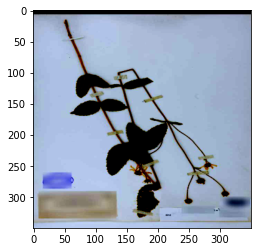

In [14]:
plt.imshow(img.permute(1, 2, 0))

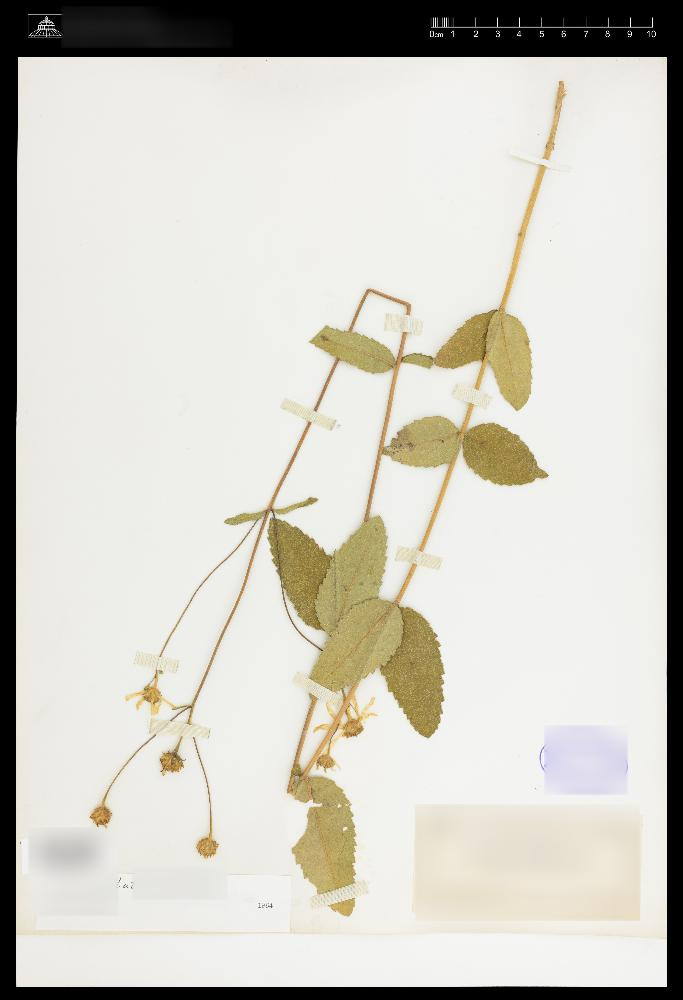

In [15]:
imga = Image.open(pth)
display(imga)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


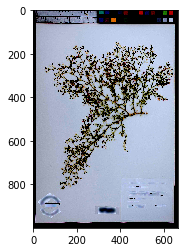

In [16]:
import matplotlib.pyplot as plt

def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')
show(img)

In [ ]:
import glob
import numpy as np
from tqdm.auto import tqdm
from joblib import Parallel, delayed
PATH_DATASET="/home/amorante/herbarium"
def _color_means(img_path):
    img = plt.imread(img_path)
    means = {i: np.mean(img[..., i]) / 255.0 for i in range(3)}
    std = {i: np.std(img[..., i]) / 255.0 for i in range(3)}
    return means, std

images = glob.glob(os.path.join(PATH_DATASET, "train_images", "*", "*", "*.jpg"))
#control ammount of images using images[:ammount]
clr_mean_std = Parallel(n_jobs=os.cpu_count())(delayed(_color_means)(fn) for fn in tqdm(images))

img_color_mean = pd.DataFrame([c[0] for c in clr_mean_std]).describe()
display(img_color_mean)
img_color_std = pd.DataFrame([c[1] for c in clr_mean_std]).describe()
display(img_color_std)

img_color_mean = list(img_color_mean.T["mean"])
img_color_std = list(img_color_std.T["mean"])
print(img_color_mean, img_color_std)

In [ ]:
clr_mean_std

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:green; border:0' role="tab" aria-controls="home">
<center>Mapping genus</center></h3>

In [27]:
genus=[genus['genus'] for genus in train_meta['genera']]


In [31]:
len(train_meta["genera"])

2564

In [30]:
len(genus)

2564

In [3]:
genus_map = {genus['genus_id'] : genus['genus'] for genus in train_meta['genera']}
train_df['genus'] = train_df['genus'].map(genus_map)
train_df

image_id                                          image_dir  \
0       00000__001  /home/amorante/herbarium/train_images/000/00/0...   
1       00000__002  /home/amorante/herbarium/train_images/000/00/0...   
2       00000__003  /home/amorante/herbarium/train_images/000/00/0...   
3       00000__004  /home/amorante/herbarium/train_images/000/00/0...   
4       00000__005  /home/amorante/herbarium/train_images/000/00/0...   
...            ...                                                ...   
839767  15504__032  /home/amorante/herbarium/train_images/155/04/1...   
839768  15504__033  /home/amorante/herbarium/train_images/155/04/1...   
839769  15504__035  /home/amorante/herbarium/train_images/155/04/1...   
839770  15504__036  /home/amorante/herbarium/train_images/155/04/1...   
839771  15504__037  /home/amorante/herbarium/train_images/155/04/1...   

        category        genus  
0              0        Abies  
1              0        Abies  
2              0        Abies  
3              0        Abies  
4              0        Abies  
...          ...          ...  
839767     15504  Zygophyllum  
839768     15504  Zygophyllum  
839769     15504  Zygophyllum  
839770     15504  Zygophyllum  
839771     15504  Zygophyllum  

[839772 rows x 4 columns]

In [3]:
genus_map = {genus['genus_id'] : genus['genus'] for genus in train_meta['genera']}
train_df['genus'] = train_df['genus'].map(genus_map)
train_df

image_id                                          image_dir  \
0       00000__001  /home/amorante/herbarium/train_images/000/00/0...   
1       00000__002  /home/amorante/herbarium/train_images/000/00/0...   
2       00000__003  /home/amorante/herbarium/train_images/000/00/0...   
3       00000__004  /home/amorante/herbarium/train_images/000/00/0...   
4       00000__005  /home/amorante/herbarium/train_images/000/00/0...   
...            ...                                                ...   
839767  15504__032  /home/amorante/herbarium/train_images/155/04/1...   
839768  15504__033  /home/amorante/herbarium/train_images/155/04/1...   
839769  15504__035  /home/amorante/herbarium/train_images/155/04/1...   
839770  15504__036  /home/amorante/herbarium/train_images/155/04/1...   
839771  15504__037  /home/amorante/herbarium/train_images/155/04/1...   

        category        genus  
0              0        Abies  
1              0        Abies  
2              0        Abies  
3              0        Abies  
4              0        Abies  
...          ...          ...  
839767     15504  Zygophyllum  
839768     15504  Zygophyllum  
839769     15504  Zygophyllum  
839770     15504  Zygophyllum  
839771     15504  Zygophyllum  

[839772 rows x 4 columns]

In [4]:
print('Top 15 Genus ')
print(train_df['genus'].value_counts().head(15))
print()

Top 15 Genus 
Carex           24743
Astragalus      15192
Penstemon       12256
Eriogonum       10063
Erigeron         7135
Euphorbia        7070
Cyperus          6412
Phacelia         6165
Castilleja       5485
Juncus           5440
Quercus          5230
Salix            4946
Crataegus        4890
Rhynchospora     4635
Asclepias        4540
Name: genus, dtype: int64



<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:green; border:0' role="tab" aria-controls="home">
<center>Data Visualization</center></h3>

In [1]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from ast import arg
from fileinput import filename
from importlib.resources import path
from os.path import join as pjoin  # pylint: disable=g-importing-member
import time
import json
from tqdm import tqdm
import csv
import pickle
import gc
import GPUtil
import numpy as np
import pandas as pd
import torch
import torchvision as tv
from PIL import Image
from matplotlib.colors import LinearSegmentedColormap

In [2]:
  datadir="/home/amorante/herbarium"
  with open(pjoin(datadir,"train_metadata.json"), "r", encoding="ISO-8859-1") as file:
    train = json.load(file)
  train_img = pd.DataFrame(train['images'])
  train_ann = pd.DataFrame(train['annotations'])
  train_file = train_img.merge(train_ann, on='image_id')
  
  kf = StratifiedKFold(n_splits=4)
  for fold_, (train_idx, test_idx) in enumerate(kf.split(X=train_file, y=train_file['category_id'])):
    # Only training for one fold since the data is huge and I don't want you all to wait an eternity
    if fold_ != 0:
        continue
    print(f"{'='*40} Fold: {fold_+1} / {5} {'='*40}")
    
    train = train_file.loc[train_idx]
    test_file = train_file.loc[test_idx]
  


======================================== Fold: 1 / 5 ========================================


In [3]:
  test, valid, ytrain, yvalid = train_test_split(test_file, test_file["category_id"], test_size=0.4, shuffle=True)


In [4]:
valid

image_id              file_name  license  genus_id  institution_id  \
249770  04649__008  046/49/04649__008.jpg        0       733              36   
786599  14507__007  145/07/14507__007.jpg        0      2381              36   
819366  15112__015  151/12/15112__015.jpg        0      2508              36   
113114  02190__001  021/90/02190__001.jpg        0       336              36   
237031  04437__015  044/37/04437__015.jpg        0       700              36   
...            ...                    ...      ...       ...             ...   
69099   01326__004  013/26/01326__004.jpg        0       215              21   
269170  04999__004  049/99/04999__004.jpg        0       807              21   
73656   01414__021  014/14/01414__021.jpg        0       219              36   
630487  11653__006  116/53/11653__006.jpg        0      1911              36   
369681  06855__018  068/55/06855__018.jpg        0      1068              36   

        category_id  
249770         4649  
786599        14507  
819366        15112  
113114         2190  
237031         4437  
...             ...  
69099          1326  
269170         4999  
73656          1414  
630487        11653  
369681         6855  

[83978 rows x 6 columns]

In [9]:
train_df["image_dir"][3]

'/home/amorante/herbarium/train_images/000/00/00000__004.jpg'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(676, 1000)


([], [])

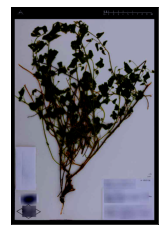

In [80]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Read the image
img1 = Image.open(train_df["image_dir"][])
print(img1.size)
mean, std = transform(img1).mean([1,2]), transform(img1).std([1,2])

# define a transform to crop the image at center
transform = transforms.ToTensor()
transform2 = transforms.Normalize(mean, std)
# transform2 = transforms.Resize((224,224))
# transform = transforms.RandomCrop((900,600))
img = transform(img1)
img = transform2(img)
img_normalized = np.array(img)
 
# transpose from shape of (3,,) to shape of (,,3)
img_normalized = img_normalized.transpose(1, 2, 0)
 
# display the normalized image
plt.imshow(img_normalized)
plt.xticks([])
plt.yticks([])
# visualize the image

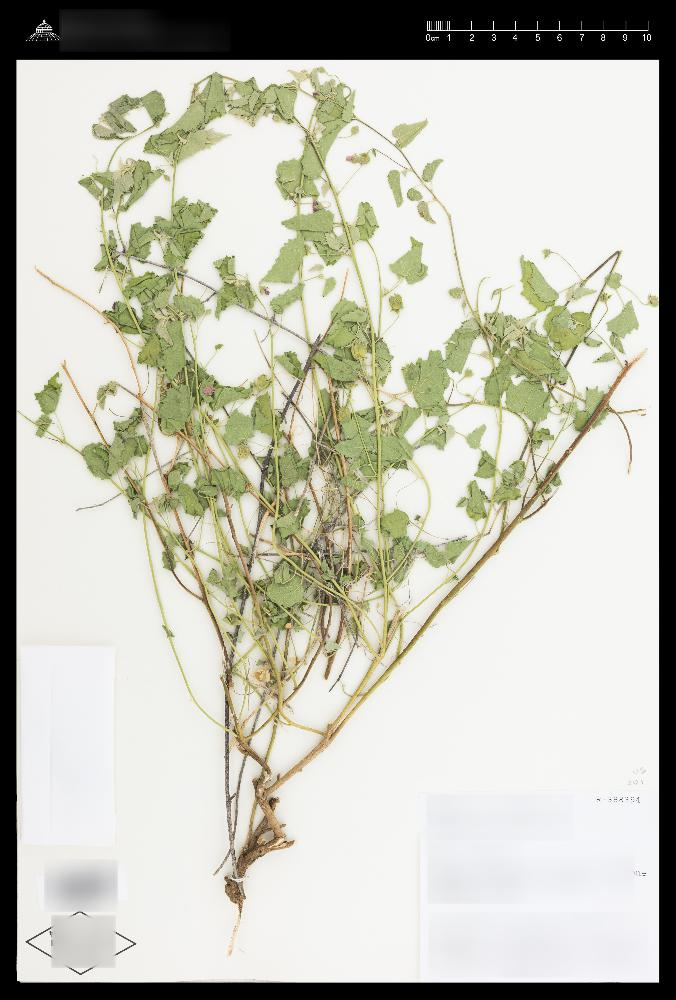

In [78]:
img1

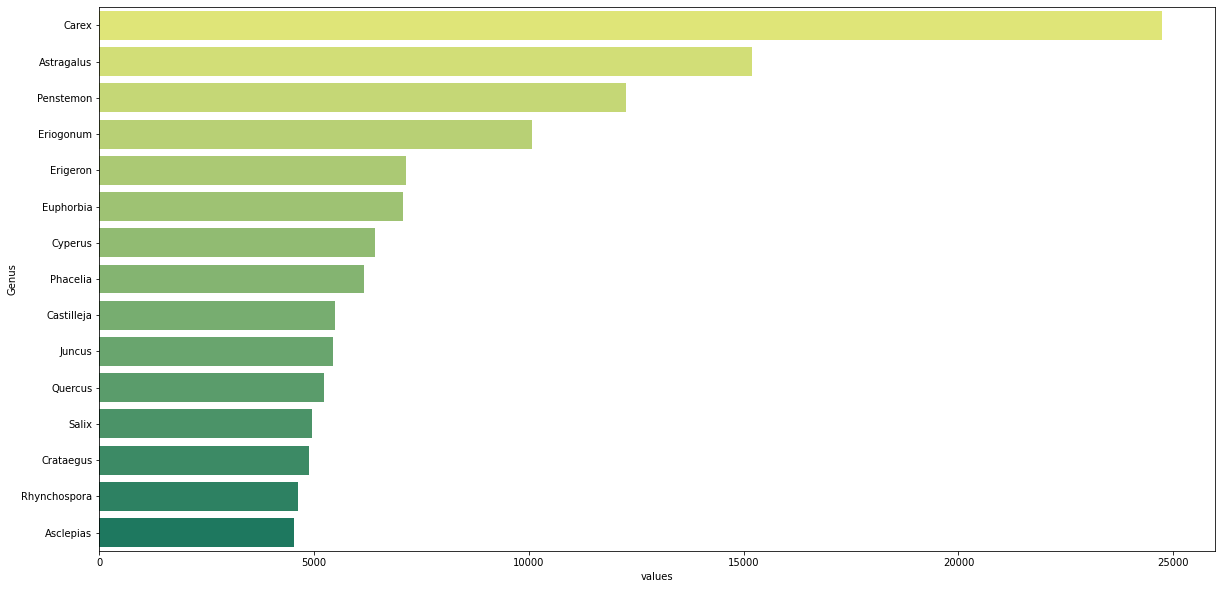

In [5]:
data = train_df['genus'].value_counts().head(15)
data = pd.DataFrame({'Genus' : data.index,
                     'values' : data.values})
plt.figure(figsize = (20, 10))
sns.barplot(x='values', y = 'Genus', data = data , palette='summer_r')
plt.show()

In [15]:
def show_images(speices):
    images = train_df.loc[train_df['genus'] == speices]['image_dir'][:6]
    i = 1
    fig = plt.figure(figsize = (18, 18))
    plt.suptitle(speices, fontsize = '30')
    for image in images:
        img = cv2.imread(image)
        ax = fig.add_subplot(2, 3, i)
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_axis_off()
        i += 1
    plt.show()

In [16]:
show_images('Carex')

TypeError: Unexpected type <class 'numpy.ndarray'>

<Figure size 1296x1296 with 0 Axes>

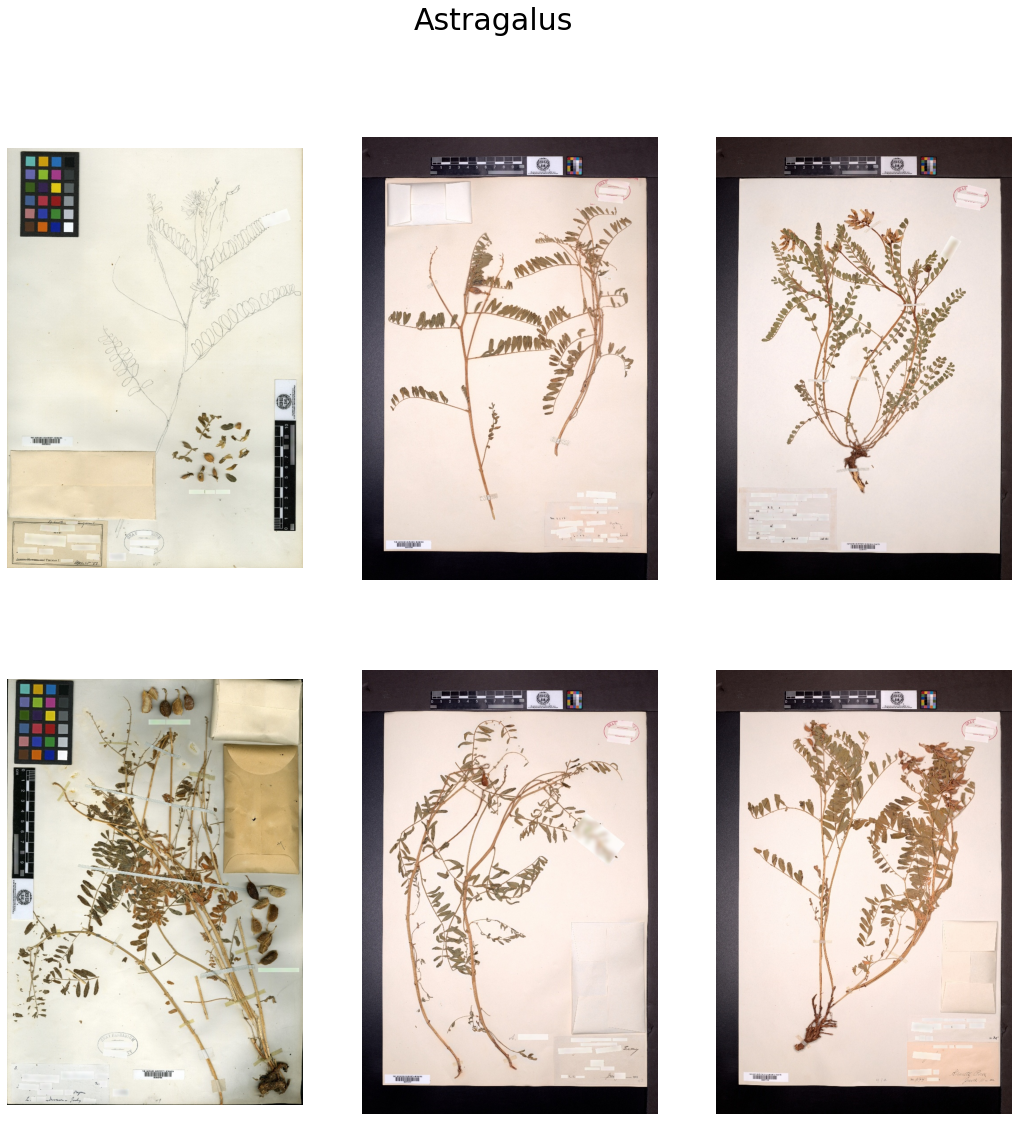

In [8]:
show_images('Astragalus')

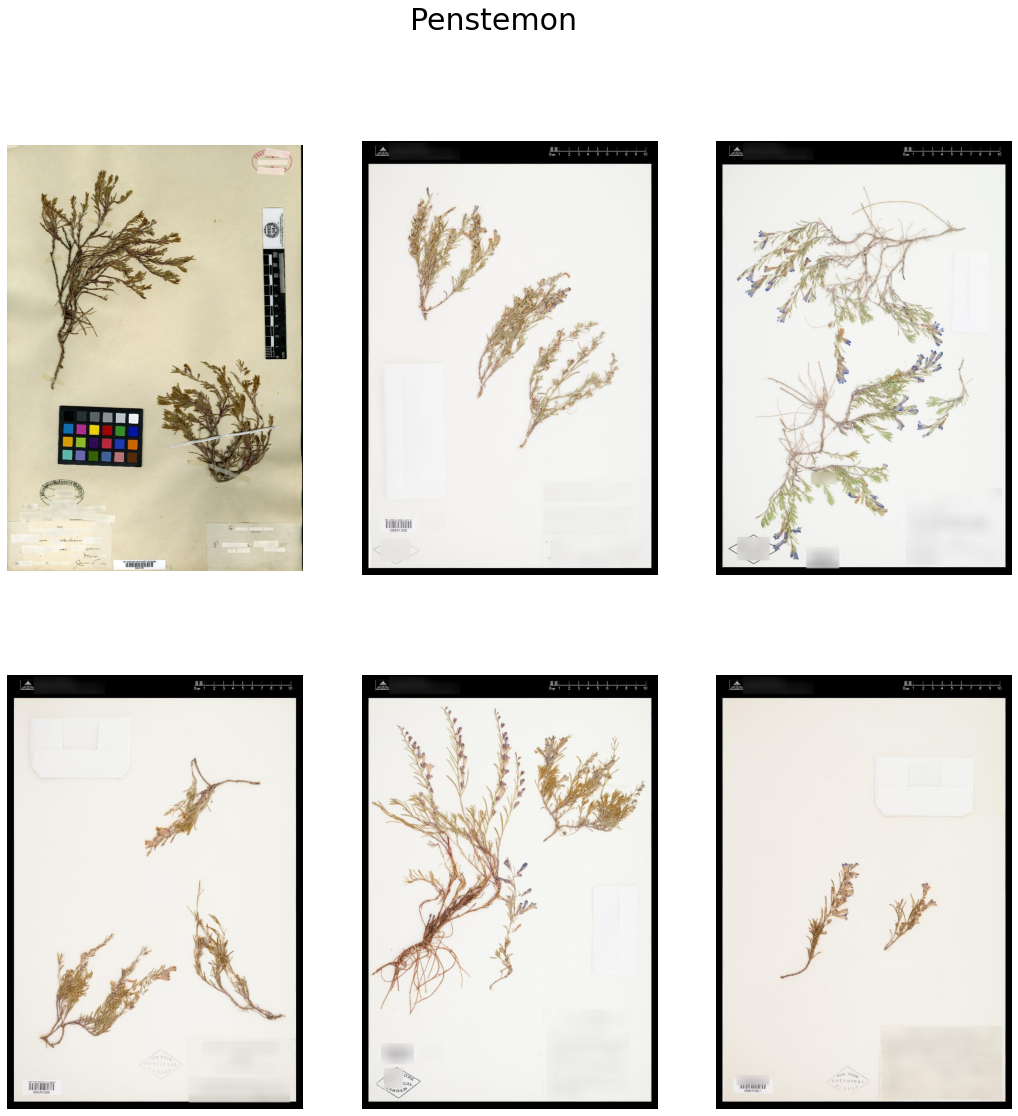

In [9]:
show_images('Penstemon')

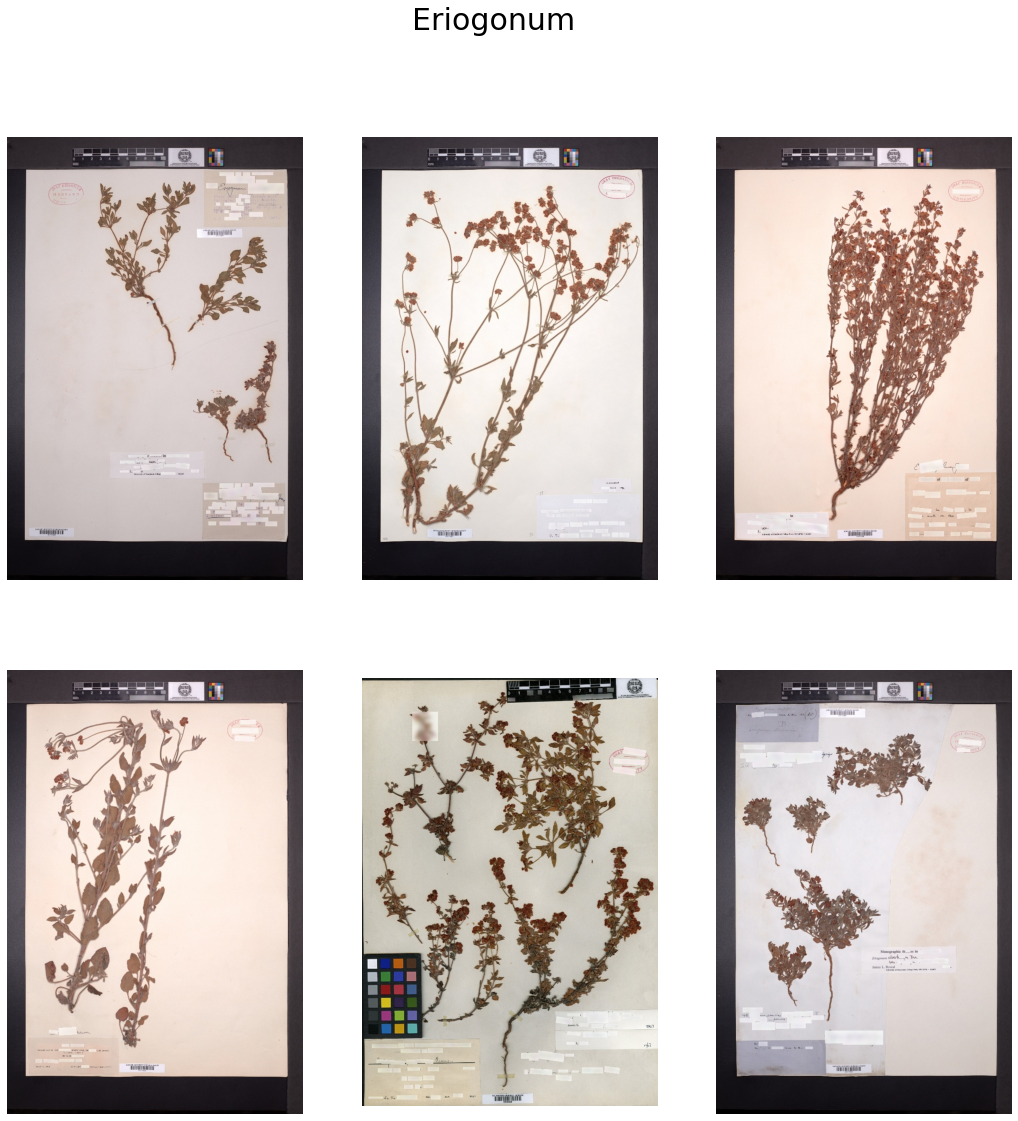

In [10]:
show_images('Eriogonum')

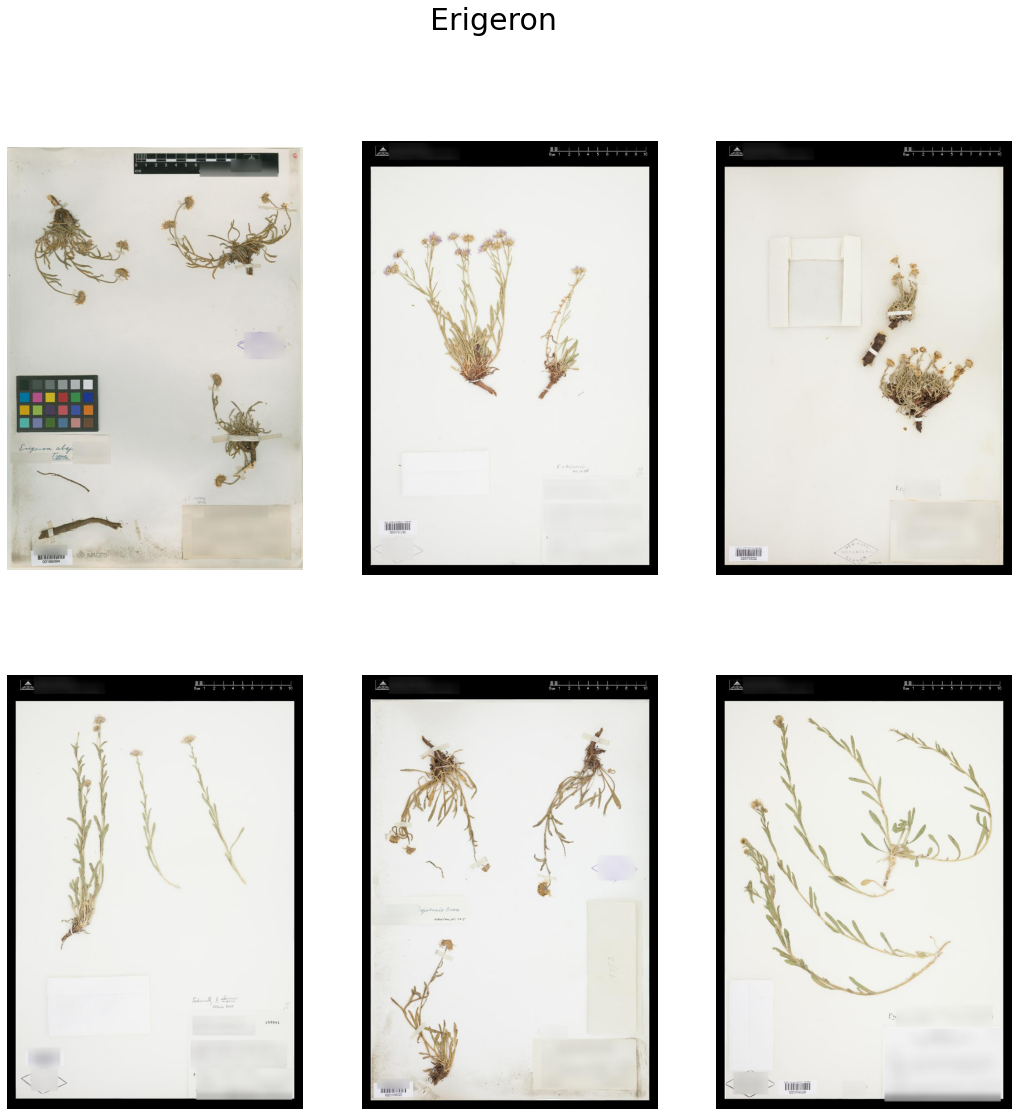

In [11]:
show_images('Erigeron')

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:green; border:0' role="tab" aria-controls="home">
<center>Modeling</center></h3>

In [12]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

In [13]:
BATCH = 128
EPOCHS = 5

LR = 0.01
IM_SIZE = 224

X_Train, Y_Train = train_df['image_dir'].values, train_df['category'].values

Transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Resize((IM_SIZE, IM_SIZE)),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

In [14]:
class GetData(Dataset):
    def __init__(self, FNames, Labels, Transform):
        self.fnames = FNames
        self.transform = Transform
        self.labels = Labels         
        
    def __len__(self):
        return len(self.fnames)

    def __getitem__(self, index):       
        x = Image.open(self.fnames[index])
    
        if "train" in self.fnames[index]:             
            return self.transform(x), self.labels[index]
        elif "test" in self.fnames[index]:            
            return self.transform(x), self.fnames[index]
                
trainset = GetData(X_Train, Y_Train, Transform)
trainloader = DataLoader(trainset, batch_size=BATCH, shuffle=True)

N_Classes = train_df['category'].nunique()
next(iter(trainloader))[0].shape

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
model = torchvision.models.densenet169(pretrained=True)

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth


  0%|          | 0.00/54.7M [00:00<?, ?B/s]

In [15]:
train_df['category'].nunique()

15501

In [16]:
print(model.classifier.in_features) 
print(model.classifier.out_features)

for param in model.parameters():
    param.requires_grad = False
    
n_inputs = model.classifier.in_features
last_layer = nn.Linear(n_inputs, N_Classes)
model.classifier = last_layer
if torch.cuda.is_available():
    model.cuda()
print(model.classifier.out_features)    

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier.parameters())

1664
1000
15501


<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:green; border:0' role="tab" aria-controls="home">
<center>Train & Evaluate</center></h3>

In [17]:
training_history = {'accuracy':[],'loss':[]}
validation_history = {'accuracy':[],'loss':[]}

from tqdm import tqdm

def train(trainloader, model, criterion, optimizer, scaler, device=torch.device("cpu")):
    train_acc = 0.0
    train_loss = 0.0
    for images, labels in tqdm(trainloader):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
    with torch.cuda.amp.autocast(enabled=True):
        output = model(images)
        loss = criterion(output, labels)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        acc = ((output.argmax(dim=1) == labels).float().mean())
        train_acc += acc
        train_loss += loss
    return train_acc/len(trainloader), train_loss/len(trainloader)

In [18]:
## Normal Evaluation
def evaluate(testloader, model, criterion, device=torch.device("cpu")):
    eval_acc = 0.0
    eval_loss = 0.0
    for images, labels in tqdm(testloader):
        images = images.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            output = model(images)
            loss = criterion(output, labels)

        acc = ((output.argmax(dim=1) == labels).float().mean())
        eval_acc += acc
        eval_loss += loss
  
    return eval_acc/len(testloader), eval_loss/len(testloader)

In [19]:
# %%time
# ##%dirsrmal Training
# scaler = torch.cuda.amp.GradScaler(enabled=True)
# for epoch in range(EPOCHS):
#     train_acc, train_loss = train(trainloader, model, criterion, optimizer, scaler, device=device)
# #   eval_acc, eval_loss = evaluate(val_loader, model, criterion, device=torch.device("cuda"))
#     print("")
#     print(f"Epoch {epoch + 1} | Train Acc: {train_acc*100} | Train Loss: {train_loss}")
# #   print(f"\t Val Acc: {eval_acc*100} | Val Loss: {eval_loss}")
#     print("===="*8)

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:green; border:0' role="tab" aria-controls="home">
<center>Conclusion</center></h3>

In [20]:
# X_test = test_df['test_dir'].values
# testset = GetData(X_Test, None, Transform)
# testloader = DataLoader(testset, batch_size=1, shuffle=False)

# s_ls = []

# with torch.no_grad():
#     model.eval()
#     for image, fname in testloader: 
#         image = image.to(device)
        
#         logits = model(image)        
#         ps = torch.exp(logits)        
#         _, top_class = ps.topk(1, dim=1)
        
#         for pred in top_class:
#             s_ls.append([fname[0].split('/')[-1][:-4], pred.item()])
            
# sub = pd.DataFrame.from_records(s_ls, columns=['Id', 'Predicted'])
# sub.head()
# sub.to_csv("submission.csv", index=False)

# Upvote!